## Task 1

D O N
T P A
N I C 

## Task 2

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Admin/Downloads/data_for_task2.csv")

In [3]:
data

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [4]:
data = data.groupby('genus', as_index=False).aggregate({'sucrose':'mean', 'alanin':'mean', 'citrate':'mean', 'glucose':'mean', 'oleic_acid':'mean'})
data

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
1,Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
2,Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
3,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [5]:
data = pd.melt(
    frame = data,
    var_name = 'metabolite',
    value_name = 'concentration',
    id_vars = "genus")
data

,genus,metabolite,concentration
0,Ascophyllum,sucrose,6.825467
1,Cladophora,sucrose,4.008792
2,Fucus,sucrose,4.355112
3,Palmaria,sucrose,0.704580
4,Saccharina,sucrose,4.183596
5,Ascophyllum,alanin,0.875429
6,Cladophora,alanin,3.997055
7,Fucus,alanin,3.566411
8,Palmaria,alanin,3.176440
9,Saccharina,alanin,3.524207


<AxesSubplot:xlabel='metabolite', ylabel='concentration'>

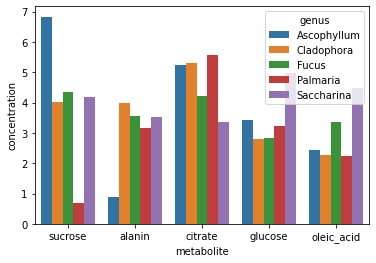

In [6]:
sns.barplot(x="metabolite", y="concentration", hue='genus', data=data)

## Task 3

In [7]:
my_iter = map(lambda x : x % 3 == 0, [1, 2, 3, 4, 5, 6])
while True:
    print(next(my_iter))

False
False
True
False
False
True


StopIteration: 

In [8]:
my_iter = map(lambda x : x % 3 == 0, [1, 2, 3, 4, 5, 6])
while True:
    try:
        print(next(my_iter))
    except StopIteration:
        break

False
False
True
False
False
True


It is more preferrable to use iterators in such cases when we work with big (or infinite) data, because iterator does not store all the elements but instead generates them one by one, saving memory. But we would not be able to pull specific element from sme specified position if we used iterator without converting it to list.

## Task 4

In [9]:
import urllib.request as urllib2

nums = [22, 43, 264, 1990]

for n in nums:
    math = urllib2.urlopen(f'http://numbersapi.com/{n}/math').read().decode('utf-8')
    hist = urllib2.urlopen(f'http://numbersapi.com/{n}/date').read().decode('utf-8') if n < 31 else urllib2.urlopen(f'http://numbersapi.com/{n}/year').read().decode('utf-8')
    print(f'Interesting facts about number {n}:\n\tMATH: {math}\n\tHIST: {hist}\n')

Interesting facts about number 22:
	MATH: 22 is a pentagonal number and a centered heptagonal number.
	HIST: January 22nd is the day in 1968 that Apollo 5 lifts off carrying the first Lunar module into space.

Interesting facts about number 43:
	MATH: 43 is a centered heptagonal number.
	HIST: 43 is the year that the warrior Trung Sisters commit suicide after their resistance is defeated at Nam Viet in Vietnam.

Interesting facts about number 264:
	MATH: 264 is the largest known number whose square is undulating.
	HIST: 264 is the year that Sun Hao succeeds Sun Xiu as ruler of the Chinese Kingdom of Wu.

Interesting facts about number 1990:
	MATH: 1990 is a stella octangula number.
	HIST: 1990 is the year that Metropolitan Alexy of Leningrad is elected Russian Orthodox Patriarch of Moscow and all Russia on June 7th.



## Task 5

In [10]:
from cobra import test
model = test.create_test_model("textbook") # Name: e_coli_core
model

Name,e_coli_core
Memory address,0x01ce006d43d0
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [11]:
model.metabolites.nadh_c.summary(fva=0.95)

Percent,Flux,Range,Reaction,Definition
0.00%,0,[-1.271; 0],ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
13.14%,5.064,[0; 7.382],AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.00%,0,[-1.107; 0],ALCD2x,etoh_c + nad_c <=> acald_c + h_c + nadh_c
8.04%,3.1,[2.945; 3.1],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,[11.2; 17.79],GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.00%,0,[-1.073; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
13.14%,5.064,[0.3644; 13.55],MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
0.00%,0,[0; 6.885],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 25.82],NADTRHD,nad_c + nadph_c --> nadh_c + nadp_c
24.09%,9.283,[3.903; 18.77],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c


In [12]:
getattr(model.genes, "b3236").knock_out()
model.metabolites.nadh_c.summary(fva=0.95)

Percent,Flux,Range,Reaction,Definition
0.00%,0,[-1.513; 0],ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
18.46%,7.449,[0; 8.076],AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.00%,0,[-1.242; 0],ALCD2x,etoh_c + nad_c <=> acald_c + h_c + nadh_c
7.26%,2.929,[2.783; 2.929],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,[9.838; 17.91],GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.00%,0,[-1.188; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
1.83%,0.738,[0; 11.9],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 44.63],NADTRHD,nad_c + nadph_c --> nadh_c + nadp_c
28.34%,11.43,[0.5791; 18.69],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Range,Reaction,Definition


NADH is no longer produced in MDH reaction, and its' production is slightly increased in AKGDH, GAPD, PDH and ME1 reactions. Some increase in NADH consumtion by NADH16 reaction can also be observed.